## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!nvidia-smi

Fri May 30 16:37:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.52                 Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8            N/A  / 5001W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Data Preprocessing

### Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred", # go inside train folder, whatever is the name of the directory, select it as a label
    label_mode="categorical", # because I am solving multi class problem, that's why change to categorical
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,     # to reduce the biasness
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[198.5  179.5  172.5 ]
   [205.25 186.25 179.25]
   [193.5  174.5  167.5 ]
   ...
   [204.75 185.75 179.75]
   [201.25 182.25 176.25]
   [200.5  181.5  175.5 ]]

  [[197.   178.   171.  ]
   [196.25 177.25 170.25]
   [190.25 171.25 164.25]
   ...
   [203.75 184.75 178.75]
   [201.5  182.5  176.5 ]
   [200.25 181.25 175.25]]

  [[196.75 177.75 170.75]
   [195.75 176.75 169.75]
   [198.   179.   172.  ]
   ...
   [202.25 183.25 177.25]
   [201.5  182.5  176.5 ]
   [200.   181.   175.  ]]

  ...

  [[203.25 186.25 178.25]
   [203.5  186.5  178.5 ]
   [197.   180.   172.  ]
   ...
   [204.5  187.5  179.5 ]
   [210.5  193.5  185.5 ]
   [206.75 189.75 181.75]]

  [[201.5  184.5  176.5 ]
   [196.5  179.5  171.5 ]
   [199.25 182.25 174.25]
   ...
   [208.5  191.5  183.5 ]
   [210.   193.   185.  ]
   [203.5  186.5  178.5 ]]

  [[201.   184.   176.  ]
   [194.75 177.75 169.75]
   [207.5  190.5  182.5 ]
   ...
   [206.75 189.75 181.75]
   [197.   180.   172.  ]
   [202.25 185.25 17

### Challenges faced during training the Model
1. First of all, Chose small learning rate by default 0.001, which took longer time (hours and hours) to train the model.
2. Then after, tried by increasing the learning rate to 0.009, but dodn't work. Finally, selected final learning rate as : 0.0001.
2. Following it, faced underfitting issue, as training, and accuracy was fluctuating between 60 to 65%.
3. As a result of it, I increased number of neurons, for better training. 
4. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature.
5. Faced Overfitting issues, to resolve it added dropouts at second last layer, and after flatten images from 2d to 1d, before the o/p layer

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [36]:
## Building Convolution Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.6))

In [17]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2197/2197 [==============================] - 588s 262ms/step - loss: 1.5430 - accuracy: 0.5493 - val_loss: 0.6493 - val_accuracy: 0.7948
Epoch 2/15
2197/2197 [==============================] - 1165s 530ms/step - loss: 0.4905 - accuracy: 0.8471 - val_loss: 0.2713 - val_accuracy: 0.9111
Epoch 3/15
2197/2197 [==============================] - 542s 246ms/step - loss: 0.2833 - accuracy: 0.9116 - val_loss: 0.1819 - val_accuracy: 0.9422
Epoch 4/15
2197/2197 [==============================] - 327s 148ms/step - loss: 0.1930 - accuracy: 0.9386 - val_loss: 0.1508 - val_accuracy: 0.9515
Epoch 5/15
2197/2197 [==============================] - 325s 148ms/step - loss: 0.1460 - accuracy: 0.9532 - val_loss: 0.1354 - val_accuracy: 0.9566
Epoch 6/15
2197/2197 [==============================] - 332s 151ms/step - loss: 0.1115 - accuracy: 0.9646 - val_loss: 0.1788 - val_accuracy: 0.9454
Epoch 7/15
2197/2197 [==============================] - 349s 159ms/step - loss: 0.0981 - accuracy: 0.9688 - val

## Model Evaluation

In [21]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 180s 82ms/step - loss: 0.0202 - accuracy: 0.9937


In [22]:
print(train_loss,train_acc)

0.020186983048915863 0.9937121868133545


In [23]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 36s 65ms/step - loss: 0.1039 - accuracy: 0.9709


In [55]:
print(val_loss,val_acc)

0.12766246497631073 0.9598793387413025


### Saving Model

In [56]:
model.save("trained_model.keras")

In [57]:
training_history.history

{'loss': [1.2988221645355225,
  0.4250439405441284,
  0.2601763606071472,
  0.1824849247932434,
  0.1340349018573761,
  0.10951735824346542,
  0.08650864660739899,
  0.07379234582185745,
  0.06468035280704498,
  0.05716381594538689],
 'accuracy': [0.6160182356834412,
  0.8649405837059021,
  0.915683925151825,
  0.939554750919342,
  0.9559285640716553,
  0.9630414843559265,
  0.9714062213897705,
  0.9761149287223816,
  0.9784622192382812,
  0.9819332957267761],
 'val_loss': [0.49758660793304443,
  0.27911141514778137,
  0.20994535088539124,
  0.16642577946186066,
  0.1323128193616867,
  0.13263362646102905,
  0.14675991237163544,
  0.1379571557044983,
  0.13152897357940674,
  0.1276625692844391],
 'val_accuracy': [0.8434441089630127,
  0.908604621887207,
  0.9324493408203125,
  0.9440017938613892,
  0.9584566354751587,
  0.9597086310386658,
  0.9571477174758911,
  0.9601638913154602,
  0.9622126221656799,
  0.9598793387413025]}

In [58]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [59]:
training_history.history['val_accuracy']

[0.8434441089630127,
 0.908604621887207,
 0.9324493408203125,
 0.9440017938613892,
 0.9584566354751587,
 0.9597086310386658,
 0.9571477174758911,
 0.9601638913154602,
 0.9622126221656799,
 0.9598793387413025]

### Accuracy Visualization

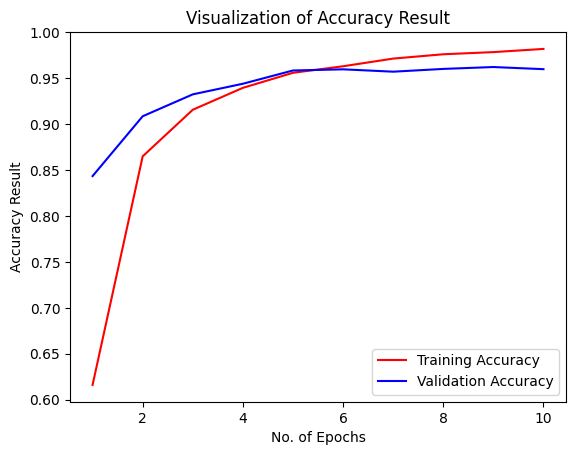

In [60]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Other metrics for model evaluation

In [71]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,  # it will pass class labels in a sequential manner
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [73]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 19s 34ms/step


(array([[9.91720676e-01, 1.74618581e-05, 4.02557780e-05, ...,
         2.28110264e-09, 4.16826502e-08, 3.95574318e-07],
        [6.70830905e-01, 6.00912655e-03, 1.04434061e-04, ...,
         3.32962799e-07, 1.15551893e-06, 1.28679685e-05],
        [9.99835610e-01, 1.60418017e-06, 2.80417225e-06, ...,
         3.13528752e-11, 3.51592999e-09, 6.26481409e-08],
        ...,
        [7.66229701e-12, 7.77188576e-14, 1.24022537e-09, ...,
         2.41918681e-13, 1.16530375e-13, 1.00000000e+00],
        [1.91091323e-10, 4.65748707e-12, 1.96633163e-08, ...,
         5.59530981e-12, 3.12107957e-12, 9.99999523e-01],
        [1.06614552e-11, 7.59849648e-13, 1.20132099e-10, ...,
         2.28978381e-12, 2.49629123e-10, 9.99930382e-01]], dtype=float32),
 (17572, 38))

In [74]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [75]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [78]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [79]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.82      0.90       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.90      0.99      0.94       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.93      0.96       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.95      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.91      0.

In [82]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[412,   8,   3, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 429, ...,   0,   0,   1],
       ...,
       [  0,   0,   2, ..., 469,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   1, 475]], dtype=int64)

### Confusion Matrix Visualization

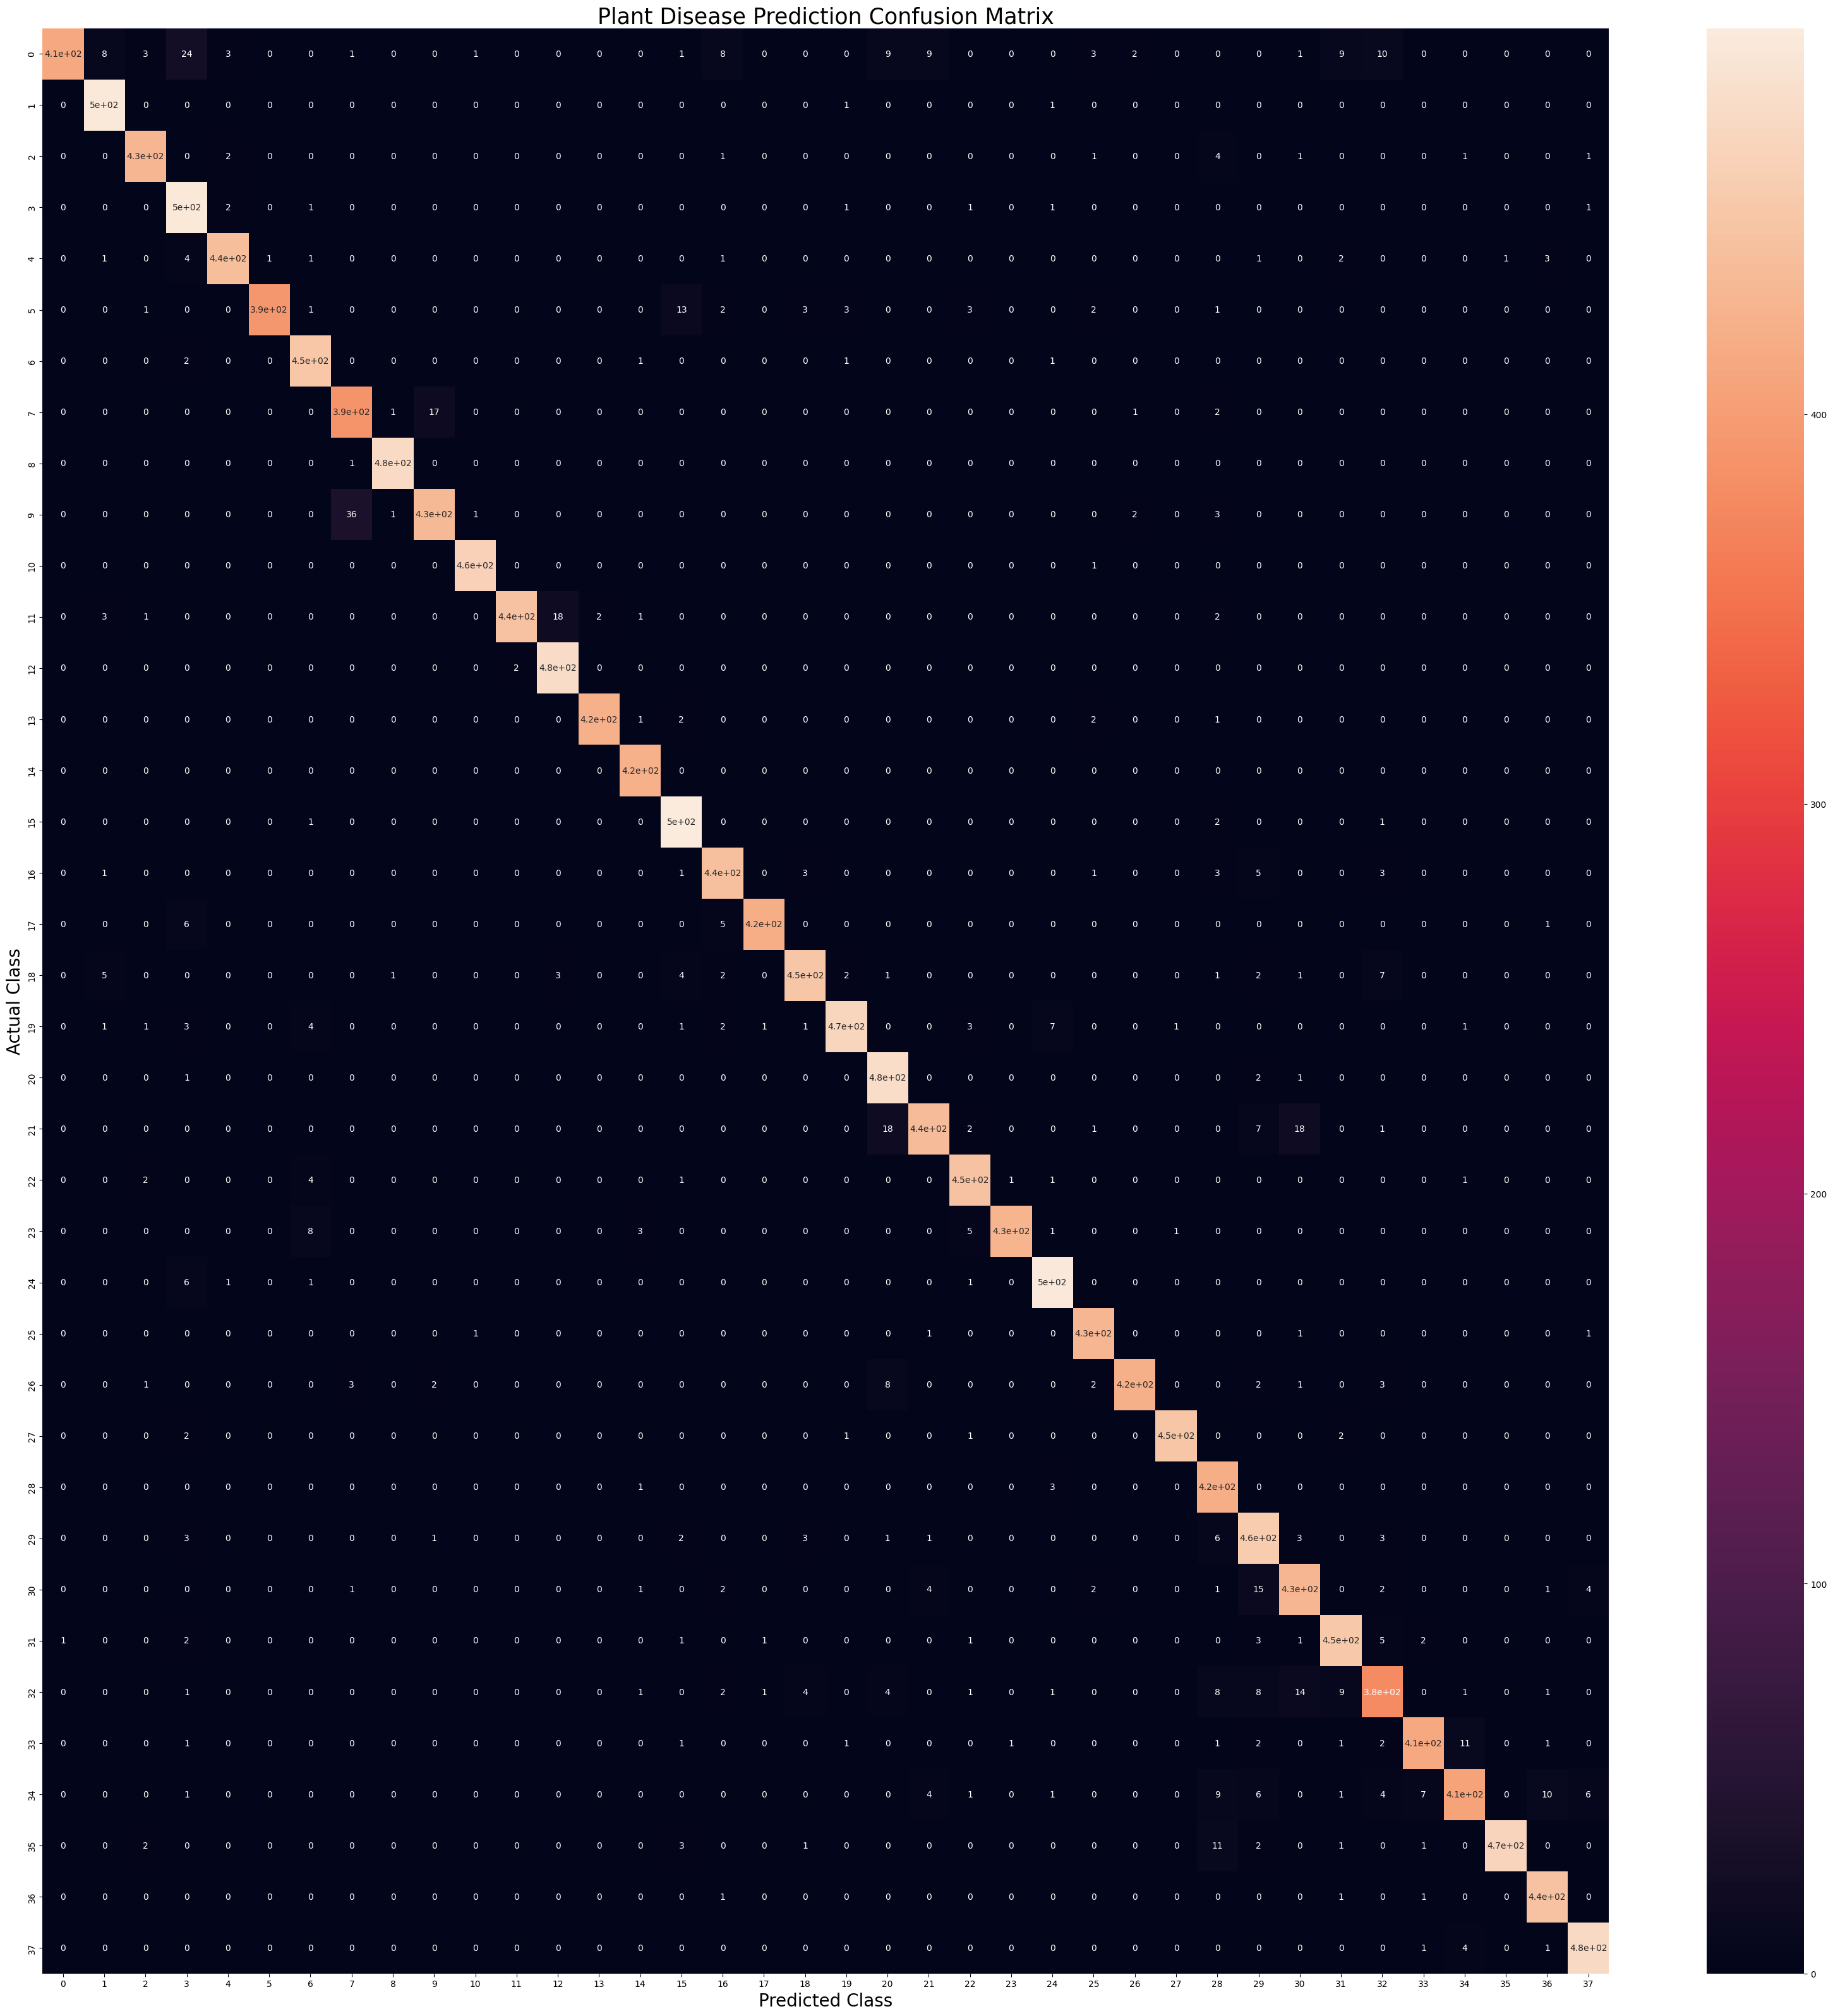

In [83]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()